In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

### Homework 1.4.1 - Shooting Method

By using shooting method, solve

$$
\frac{d^2 T}{d x^2} + \alpha (T_0 - T) = 0
$$

Where $\alpha = 5\times10^{-2}$, and $T_0 = 20$, subjected to $T(0) = 50$ and $T(10) = 200$

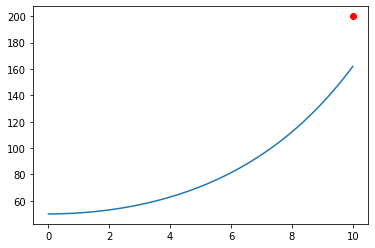

In [11]:
alpha = 0.05
t_i = 20

t_0 = 50
t_10 = 200

t_init = [t_0, 0] # [x , x']
def rhs(t, x):
    return [t[1], -alpha*(t_i - t[0])]


x = np.linspace(0, 10, 100)

def plot_graph(t, x, tf, xf):
    # plot the solution
    plt.plot(x, t[:, 0])
    # plot the boundary at t_final
    plt.plot(xf, tf, 'ro')
    plt.show()
    
plot_graph(odeint(rhs, t_init, x), x, t_10, 10)

1.839690290135704


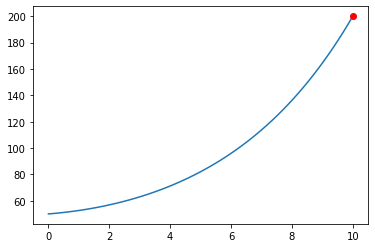

In [19]:
from scipy.optimize import brentq

def objective_func(v0):
    sol = odeint(rhs, [t_0, v0], x)
    y_final = sol[-1, 0]
    return y_final - t_10

v0 = brentq(objective_func, 0, 200)
print(v0)
plot_graph(odeint(rhs, [t_0, v0], x), x, t_10, 10)

___
### Homework 1.4.2 - Finite Difference Method

Solve Homework 1.4.1 using finite difference method